In [171]:
#a. to control the FWER at 0.05 we need to divide by the number of tests = 382 tests


rej_thresh = 0.05/382

#we control at. 0.00013


import numpy as np
import scipy
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

import statsmodels.api as sm

import statsmodels.formula.api as smf

import seaborn as sns
import matplotlib.pyplot as plt

In [341]:
#b
#REDO. 
#need to run linear regression at all SNP's

#perform association analysis: linear regression phenotype against genotype 

#do we use the intercept thing or no?

#what does adding the constant do?

genotype_data =  np.loadtxt("gwas.geno",delimiter = " ")
phenotype_data = np.loadtxt("gwas.pheno", delimiter = " ")

genotype_df = pd.DataFrame(genotype_data)

phenotype_df = pd.DataFrame(phenotype_data)


print(sm.add_constant(genotype_df))

phenotype_1 =  phenotype_df[0]
phenotype_2 = phenotype_df[1]
phenotype_3 = phenotype_df[2]
phenotype_4 = phenotype_df[3]



model1 = sm.OLS(phenotype_1, sm.add_constant(genotype_df))
results1 = model1.fit()

model2 = sm.OLS(phenotype_2, sm.add_constant(genotype_df))
results2 = model2.fit()

model3 = sm.OLS(phenotype_3, sm.add_constant(genotype_df))
results3 = model3.fit()

model4 = sm.OLS(phenotype_4, sm.add_constant(genotype_df))
results4 = model4.fit()


phen_1_pvals = results1.pvalues[1:]
phen_2_pvals = results2.pvalues[1:]
phen_3_pvals = results3.pvalues[1:]
phen_4_pvals = results4.pvalues[1:]



print(np.where(phen_1_pvals<=rej_thresh)[0])
print(np.where(phen_2_pvals<=rej_thresh)[0])
print(np.where(phen_3_pvals<=rej_thresh)[0])
print(np.where(phen_4_pvals<=rej_thresh)[0])

#the np.where function returns the actual index of the p values that are significant, but since there's a 
#constant value here all the indices are shifted up 1. 



#ask about positionality 

#snp 258 is associated with phenotype 2
#snp 119 is associated with phenotype 3
#snp 43 is associated iwth phenotype 4

#print(phen_2_pvals.get(key = 257))
#print(phen_3_pvals.get(key = 118))
#print(phen_4_pvals.get(key = 42))



#this produces the wrong model. 

    

     const    0    1    2    3    4    5    6    7    8  ...  372  373  374  \
0      1.0  0.0  0.0  2.0  2.0  0.0  1.0  0.0  0.0  1.0  ...  1.0  0.0  1.0   
1      1.0  0.0  0.0  1.0  2.0  1.0  2.0  1.0  0.0  1.0  ...  0.0  1.0  1.0   
2      1.0  0.0  1.0  1.0  2.0  1.0  2.0  0.0  0.0  0.0  ...  2.0  1.0  0.0   
3      1.0  0.0  0.0  2.0  2.0  0.0  2.0  0.0  0.0  1.0  ...  2.0  2.0  2.0   
4      1.0  0.0  0.0  1.0  2.0  1.0  2.0  0.0  0.0  1.0  ...  2.0  1.0  2.0   
..     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
495    1.0  0.0  0.0  2.0  1.0  1.0  2.0  0.0  0.0  2.0  ...  1.0  1.0  0.0   
496    1.0  1.0  0.0  1.0  2.0  0.0  1.0  0.0  1.0  1.0  ...  2.0  1.0  2.0   
497    1.0  0.0  0.0  1.0  2.0  0.0  2.0  0.0  0.0  1.0  ...  2.0  2.0  2.0   
498    1.0  1.0  0.0  2.0  2.0  1.0  1.0  0.0  0.0  2.0  ...  2.0  1.0  2.0   
499    1.0  1.0  1.0  2.0  1.0  2.0  2.0  0.0  0.0  2.0  ...  1.0  2.0  2.0   

     375  376  377  378  379  380  381  
0    0.0  

In [351]:
#correct model:
#print(sm.add_constant(genotype_data[1]))
#p_vals_phen1 = []
#for i in range(len(genotype_df.columns)):
#    model_temp = sm.OLS(phenotype_1, sm.add_constant(genotype_df[i]))
#    results_temp = model1_temp.fit()
#    p_vals.append(results_temp.pvalues[1])

pvals_phen1 = []
phenotype = phenotype_data[:, 0]
for snp_index in range(genotype_data.shape[1]):
    genotype = genotype_data[:, snp_index]
    X = sm.add_constant(genotype)
    model = sm.OLS(phenotype, X)
    results = model.fit()
    pvals_phen1.append(results.pvalues[1])


pvals_phen2 = []
phenotype = phenotype_data[:, 1]
for snp_index in range(genotype_data.shape[1]):
    genotype = genotype_data[:, snp_index]
    X = sm.add_constant(genotype)
    model = sm.OLS(phenotype, X)
    results = model.fit()
    pvals_phen2.append(results.pvalues[1])




pvals_phen3 = []
phenotype = phenotype_data[:, 2]
for snp_index in range(genotype_data.shape[1]):
    genotype = genotype_data[:, snp_index]
    X = sm.add_constant(genotype)
    model = sm.OLS(phenotype, X)
    results = model.fit()
    pvals_phen3.append(results.pvalues[1])




pvals_phen4 = []
phenotype = phenotype_data[:, 3]
for snp_index in range(genotype_data.shape[1]):
    genotype = genotype_data[:, snp_index]
    X = sm.add_constant(genotype)
    model = sm.OLS(phenotype, X)
    results = model.fit()
    pvals_phen4.append(results.pvalues[1])



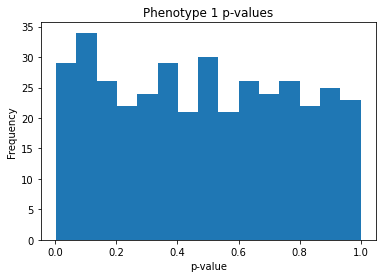

In [356]:
plt.hist(pvals_phen1, bins = 15)
plt.title('Phenotype 1 p-values')  # Add a title
plt.xlabel('p-value')
plt.ylabel('Frequency')
plt.show()

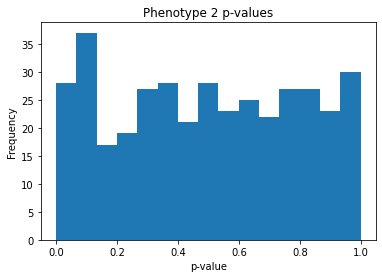

In [357]:
plt.hist(pvals_phen2, bins = 15)
plt.title('Phenotype 2 p-values')  # Add a title
plt.xlabel('p-value')
plt.ylabel('Frequency')
plt.show()

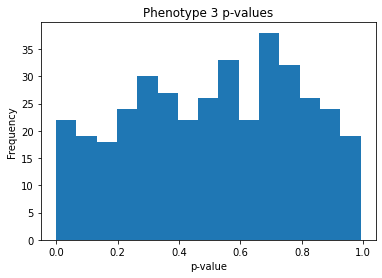

In [358]:
plt.hist(pvals_phen3, bins = 15)
plt.title('Phenotype 3 p-values')  # Add a title
plt.xlabel('p-value')
plt.ylabel('Frequency')
plt.show()

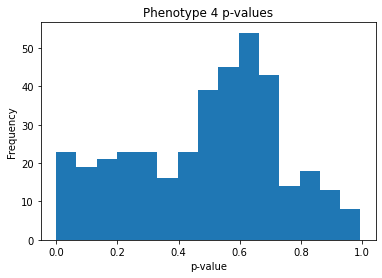

In [359]:
plt.hist(pvals_phen4, bins = 15)
plt.title('Phenotype 4 p-values')  # Add a title
plt.xlabel('p-value')
plt.ylabel('Frequency')
plt.show()

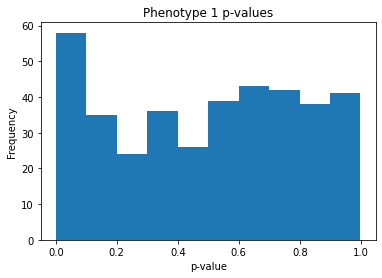

In [290]:
#c
plt.hist(phen_1_pvals, bins=10)
plt.title('Phenotype 1 p-values')  # Add a title
plt.xlabel('p-value')
plt.ylabel('Frequency')
plt.show()

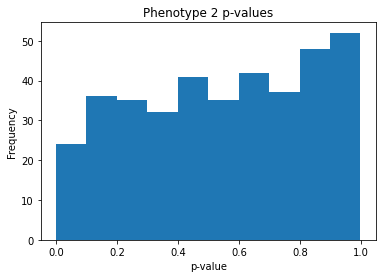

In [291]:
plt.hist(phen_2_pvals, bins = 10)
plt.title('Phenotype 2 p-values')  # Add a title
plt.xlabel('p-value')
plt.ylabel('Frequency')
plt.show()

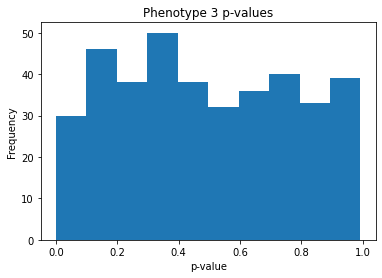

In [292]:
plt.hist(phen_3_vals_plot, bins = 10)
plt.title('Phenotype 3 p-values')  # Add a title
plt.xlabel('p-value')
plt.ylabel('Frequency')
plt.show()

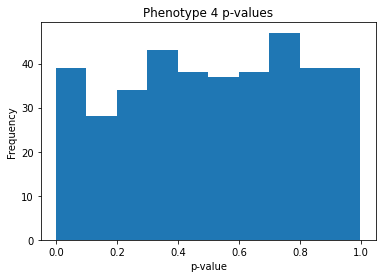

In [293]:
plt.hist(phen_4_pvals, bins = 10)
plt.title('Phenotype 4 p-values')  # Add a title
plt.xlabel('p-value')
plt.ylabel('Frequency')
plt.show()

Index(['const',       0,       1,       2,       3,       4,       5,       6,
             7,       8,
       ...
           372,     373,     374,     375,     376,     377,     378,     379,
           380,     381],
      dtype='object', length=383)
257    1.214078e-118
dtype: float64


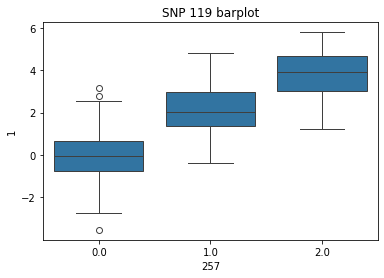

In [295]:
#d

#do this only for the SNP's of interest.

#An additional check is to plot the relationship between
#phenotype (on y-axis) vs genotype (on x-axis) for the SNPs 
#that are discovered to be associated. Since the genotype takes
#values in {0,1,2}, we can use either use a boxplot 
#(boxplot in R or Python) or add random noise to the 
#genotype to aid visualization. Plot this relationship for
#each SNP-phenotype association. Which of the 
#associations might be a result of model violation? 
#In each of these cases, what assumption do you think is violated ?

#snp 258 is associated with phenotype 2
#snp 119 is associated with phenotype 3
#snp 43 is associated iwth phenotype 4

#snps can take values of 0,1 or 2

genotype_with_constant = sm.add_constant(genotype_df)

check1 = genotype_with_constant[257]
check2 = genotype_with_constant[118]
check3 = genotype_with_constant[42]

#still need to add 1 when we discuss which ones we reject. 

print(genotype_with_constant.columns)

model_check = sm.OLS(phenotype_2, genotype_with_constant[257])
results_check = model_check.fit()
print(results_check.pvalues)
#checking to make sure the fit is right. 

sns.boxplot(x = check1, y = phenotype_2)
plt.title('SNP 258 barplot')  # Add a title
plt.show()

Text(0.5, 1.0, 'SNP 119 barplot')

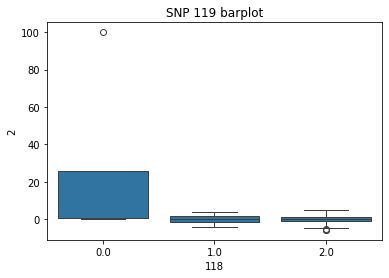

In [296]:
sns.boxplot(x = check2, y = phenotype_3)
plt.title('SNP 119 barplot')  # Add a title


Text(0.5, 1.0, 'SNP 43 barplot')

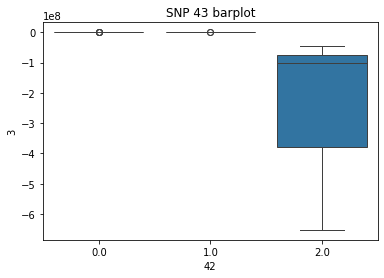

In [297]:
sns.boxplot(x = check3, y = phenotype_4)
plt.title('SNP 43 barplot')


In [ ]:
#4: ridge regression ''